In [7]:
# Data handling and visualization
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
def fetch_stock_data(ticker: str, start: str, end: str) -> pd.DataFrame:
    """
    Fetch historical stock data using yfinance.

    Args:
        ticker (str): Stock ticker symbol (e.g., 'AAPL').
        start (str): Start date (e.g., '2022-01-01').
        end (str): End date (e.g., '2024-12-31').

    Returns:
        pd.DataFrame: Stock data with OHLCV.
    """
    data = yf.download(ticker, start=start, end=end)
    return data

# Example: Fetch Apple stock data
stock_symbol = 'AAPL'
stock_data = fetch_stock_data(stock_symbol, '2022-01-01', '2024-12-31')
stock_data.head()


C:\Users\Areej Aftab\AppData\Local\Temp\ipykernel_6524\2752488601.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645630,179.499559,174.425125,174.542902,104487900
2022-01-04,176.378357,179.558473,175.809076,179.254206,99310400
2022-01-05,171.686676,176.839632,171.411853,176.289986,94537600
2022-01-06,168.820679,172.059683,168.467333,169.507737,96904000
2022-01-07,168.987564,170.921151,167.868637,169.694257,86709100


In [10]:
def prepare_data(data: pd.DataFrame) -> tuple:
    """
    Prepare the dataset for model training.

    Args:
        data (pd.DataFrame): Raw stock data.

    Returns:
        tuple: Features (X) and target (y) for prediction.
    """
    # Select relevant columns
    df = data[['Open', 'High', 'Low', 'Volume', 'Close']].copy()
    
    # Create target variable - next day's Close price
    df['Next_Close'] = df['Close'].shift(-1)
    
    # Drop last row (since it has no 'Next_Close' label)
    df.dropna(inplace=True)
    
    # Features and target
    X = df[['Open', 'High', 'Low', 'Volume']]
    y = df['Next_Close']
    
    return X, y

X, y = prepare_data(stock_data)


In [12]:
def split_data(X: pd.DataFrame, y: pd.Series, test_size: float = 0.2):
    """
    Split the dataset into training and testing sets.

    Args:
        X (pd.DataFrame): Feature set.
        y (pd.Series): Target variable.
        test_size (float): Proportion of test data.

    Returns:
        tuple: X_train, X_test, y_train, y_test
    """
    return train_test_split(X, y, test_size=test_size, shuffle=False)

X_train, X_test, y_train, y_test = split_data(X, y)


In [14]:
def train_model(X_train, y_train, model_type='linear'):
    """
    Train a regression model.

    Args:
        X_train (DataFrame): Training features.
        y_train (Series): Training labels.
        model_type (str): 'linear' or 'forest'.

    Returns:
        model: Trained regression model.
    """
    if model_type == 'linear':
        model = LinearRegression()
    elif model_type == 'forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    else:
        raise ValueError("model_type must be 'linear' or 'forest'")
    
    model.fit(X_train, y_train)
    return model

# Choose model: 'linear' or 'forest'
model = train_model(X_train, y_train, model_type='forest')


In [15]:
def evaluate_model(model, X_test, y_test):
    """
    Predict and evaluate the model performance.

    Args:
        model: Trained model.
        X_test (DataFrame): Test features.
        y_test (Series): Actual test labels.

    Returns:
        tuple: Predictions, MSE, R2 Score
    """
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"📉 Mean Squared Error: {mse:.2f}")
    print(f"📈 R2 Score: {r2:.2f}")
    
    return y_pred, mse, r2

y_pred, mse, r2 = evaluate_model(model, X_test, y_test)


📉 Mean Squared Error: 1085.82
📈 R2 Score: -4.42


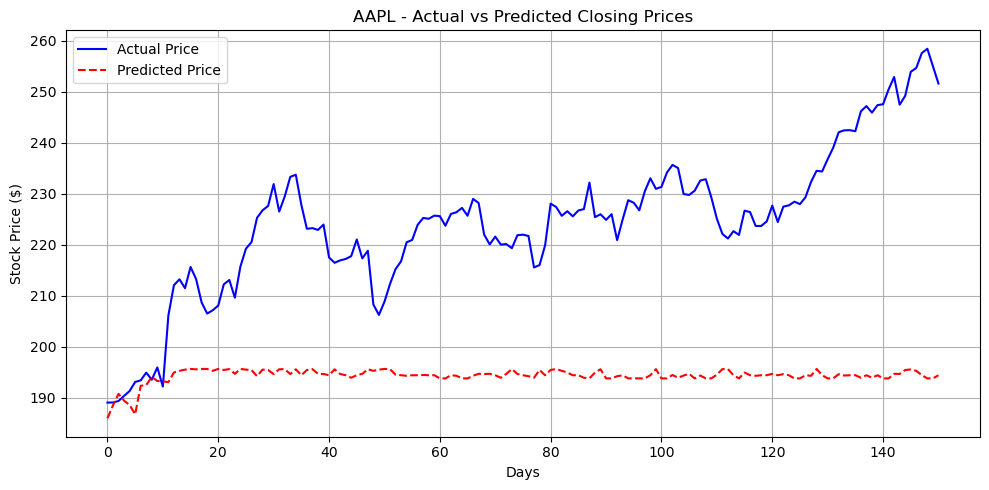

In [16]:
def plot_predictions(y_test, y_pred, title):
    """
    Plot actual vs predicted stock prices.

    Args:
        y_test (Series): Actual prices.
        y_pred (array): Predicted prices.
        title (str): Plot title.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual Price', color='blue')
    plt.plot(y_pred, label='Predicted Price', color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Days')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(y_test, y_pred, f'{stock_symbol} - Actual vs Predicted Closing Prices')


In [17]:
def predict_next_day(model, X):
    """
    Predict the next closing price using the last known data.

    Args:
        model: Trained model.
        X (DataFrame): Full feature set.

    Returns:
        float: Predicted next close price.
    """
    last_row = X.iloc[[-1]]
    predicted_next = model.predict(last_row)[0]
    return predicted_next

next_price = predict_next_day(model, X)
print(f"🔮 Predicted Closing Price for Next Trading Day: ${next_price:.2f}")


🔮 Predicted Closing Price for Next Trading Day: $194.45
